<a href="https://colab.research.google.com/github/juliensky/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/LS_DS12_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [6]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [7]:
df.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [8]:
df2 = df
df2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


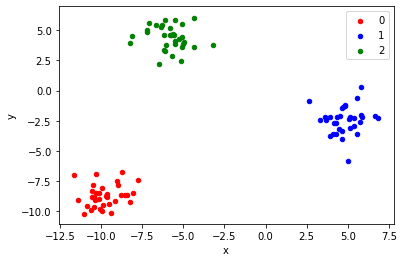

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

#x = df.drop('id','Unnamed: 32', axis=1)

# Create dataframe of x, y and label values
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
df2 = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

# Create scatterplot with coloring based on assigned labels
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()   


In [10]:
df2.head()

,x,y,label
0,-5.489222,4.103073,2
1,-4.998194,3.842730,2
2,-8.766761,-6.732582,0
3,-9.739376,-8.767104,0
4,-6.033699,3.802150,2


In [110]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2) #looking at points assigning clusters
labels = kmeans.labels_

print(labels)

[1 1 0 0 1 2 2 2 0 1 2 1 1 0 0 0 1 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 0 1 1 2 2
 2 2 0 2 2 1 2 0 1 2 0 1 0 2 2 2 1 2 1 1 1 0 0 0 2 0 0 0 2 0 0 2 1 1 2 0 1
 2 0 2 2 0 1 1 2 2 2 2 2 1 0 0 2 0 0 0 1 1 1 0 2 1 1]


In [12]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)
df2['clusters'] = new_series.values

df2.head()

,x,y,label,clusters
0,-5.489222,4.103073,2,2
1,-4.998194,3.842730,2,2
2,-8.766761,-6.732582,0,1
3,-9.739376,-8.767104,0,1
4,-6.033699,3.802150,2,2


In [0]:
# it seems there's about 3 clusters to deal with.

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    sum_of_squared_distances.append(km.inertia_)

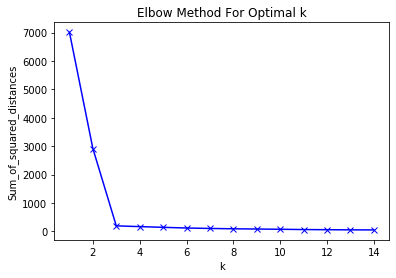

In [14]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [15]:
#standardize data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
df

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.75062224,
         1.93701461,         nan],
       [-0.23640344,  1.82982061, -0.35363241, ..., -0.24388967,
         0.28118999,         nan],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.152255  ,
         0.20139121,         nan],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ..., -1.10454895,
        -0.31840916,         nan],
       [-0.23572517,  1.83834103,  2.33645719, ...,  1.91908301,
         2.21963528,         nan],
       [-0.24240586, -1.80840125,  1.22179204, ..., -0.04813821,
        -0.75120669,         nan]])

## Check your work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [127]:
ef = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv" )
print(df.shape)



x = ef[['diagnosis']]
x = x.loc[0:99]


(100, 3)


In [0]:
y = labels

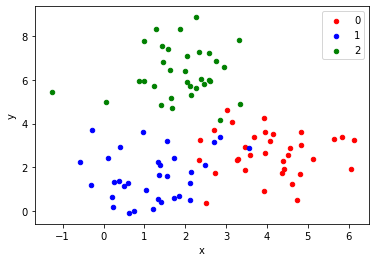

In [49]:

# Create dataframe of x, y and label values
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

# Create scatterplot with coloring based on assigned labels
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()                  

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [20]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = scaler.fit_transform(df2)
df2

array([[-0.29172437,  1.17526499,  1.23400348,  1.23091491],
       [-0.21306433,  1.12760558,  1.23400348,  1.23091491],
       [-0.81676867, -0.80835193, -1.20956777,  0.        ],
       [-0.97257632, -1.18079944, -1.20956777,  0.        ],
       [-0.37894678,  1.12017685,  1.23400348,  1.23091491],
       [ 1.33381799, -0.18226117,  0.01221786, -1.23091491],
       [ 1.44824496, -0.11452179,  0.01221786, -1.23091491],
       [ 1.36100491,  0.21142341,  0.01221786, -1.23091491],
       [-1.06196342, -0.84267532, -1.20956777,  0.        ],
       [-0.55234766,  1.447878  ,  1.23400348,  1.23091491],
       [ 1.3618946 ,  0.19235523,  0.01221786, -1.23091491],
       [-0.38998164,  1.03181129,  1.23400348,  1.23091491],
       [-0.11260153,  1.08042911,  1.23400348,  1.23091491],
       [-1.0822584 , -1.34310524, -1.20956777,  0.        ],
       [-1.06520832, -1.13557566, -1.20956777,  0.        ],
       [-0.92127264, -1.43778981, -1.20956777,  0.        ],
       [-0.39472405,  1.

In [0]:
from sklearn.decomposition import PCA

# Apply PCA to the data
pca = PCA(.9)
pca_features = pca.fit_transform(df2)



In [22]:
# PC1
pca_features[:,0:1]

array([[ 2.08154859],
       [ 2.05142458],
       [-1.25993892],
       [-1.49300643],
       [ 2.04727124],
       [-0.68361471],
       [-0.64148723],
       [-0.43683916],
       [-1.28071508],
       [ 2.25328258],
       [-0.44879849],
       [ 1.99189556],
       [ 2.02153705],
       [-1.59444582],
       [-1.46436714],
       [-1.6543073 ],
       [ 2.28124644],
       [-0.72039137],
       [-1.6588651 ],
       [ 2.22008389],
       [ 2.00047524],
       [ 2.23088206],
       [ 2.24528794],
       [ 2.30433109],
       [ 2.06366742],
       [-1.49623223],
       [-0.65727253],
       [-1.52641292],
       [-1.5234412 ],
       [-1.50411142],
       [-1.38177383],
       [-0.76702512],
       [-1.47976705],
       [ 1.93575213],
       [ 2.05803947],
       [-0.57664535],
       [-0.67165563],
       [-0.45976099],
       [-0.27410524],
       [-1.38355446],
       [-0.5344958 ],
       [-0.5789688 ],
       [ 2.21123512],
       [-0.71671613],
       [-1.46499915],
       [ 2

In [23]:
pca_features[:,1:2]

array([[-0.40720491],
       [-0.35487241],
       [-1.05887937],
       [-1.25458007],
       [-0.48651398],
       [ 1.68714881],
       [ 1.79030104],
       [ 1.78610084],
       [-1.25806404],
       [-0.55798308],
       [ 1.78303964],
       [-0.51259538],
       [-0.28533488],
       [-1.37265299],
       [-1.31835732],
       [-1.26498628],
       [-0.42534408],
       [ 1.79321978],
       [-1.47532103],
       [-0.4739576 ],
       [-0.51922324],
       [-0.46112111],
       [-0.30683392],
       [-0.19543999],
       [-0.76375407],
       [-1.35982663],
       [ 1.75696601],
       [-1.47842662],
       [-1.34114474],
       [-1.24880005],
       [-1.12159734],
       [ 1.6615222 ],
       [-1.0997659 ],
       [-0.4813125 ],
       [-0.41935764],
       [ 1.77627221],
       [ 1.66940106],
       [ 1.76689211],
       [ 1.96327653],
       [-1.31406829],
       [ 1.88019552],
       [ 1.55409974],
       [-0.40643518],
       [ 1.60357226],
       [-1.29880705],
       [-0

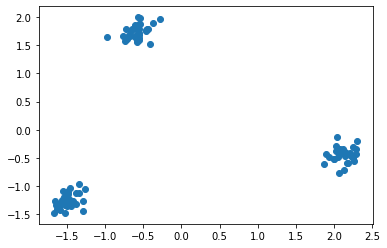

In [24]:
plt.scatter(pca_features[:,0:1], pca_features[:,1:2]);

In [0]:
def scree_plot(pca):
    
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

In [0]:
scree_plot(pca)

In [17]:
K = range(1,11)

# The average distance from each centroid, to the points in its cluster
distortion = []
for k in K:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df2)
  distortion.append(kmeans.inertia_)

distortion

[7013.72441844048,
 2916.6692874442056,
 190.78518687653542,
 163.96873834301834,
 139.1767057277924,
 118.30774420521523,
 102.86370136426214,
 90.04889248248708,
 77.65553940419018,
 68.21652946887284]

In [108]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df2)
kmeans.labels_
new = kmeans.labels_.astype('int64')
new


array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [57]:
import numpy as np

x['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [73]:
x.reset_index()

,index,diagnosis
0,0,M
1,1,M
2,2,M
3,3,M
4,4,M
...,...,...
564,564,M
565,565,M
566,566,M
567,567,M


In [131]:
accuracy_finder = pd.DataFrame({'diagnosis': x['diagnosis'], 'labels': new})
accuracy_finder

,diagnosis,labels
0,M,1
1,M,1
2,M,0
3,M,0
4,M,1
...,...,...
95,M,1
96,B,0
97,B,0
98,B,1


In [132]:
accuracy = x['diagnosis'].replace({'B': 0, 'M': 1})
accuracy

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: diagnosis, Length: 100, dtype: int64

In [143]:

#accuracy percentage
(accuracy_finder['diagnosis'] == accuracy_finder['labels']).value_counts()/len(accuracy_finder)

False    1.0
dtype: float64

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project